# Benchmark with AutoXRD paper data

This notebook compares the results between _Xerus_ method against the CNN-method implemented in the following paper:
```
Szymanski, N. J., Bartel, C. J., Zeng, Y., Tu, Q., & Ceder, G. (2021). Probabilistic Deep Learning Approach to Automate the Interpretation of Multi-phase Diffraction Spectra. Chemistry of Materials.
```
For the results of _Xerus_ in the presented alloys in the paper, please refer to the Examples.ipnyb.

# Preloads

In [1]:
# Since Xerus is nto distrubutdd as package (GSAS II etc), it is needed to append it into system path first
%load_ext autoreload
%autoreload 2
import sys, os
from pathlib import Path
currdir = Path(os.getcwd())
sys.path.append(os.path.join(currdir.parent.as_posix()))
%matplotlib inline 
from Xerus import XRay
from Xerus.utils.tools import create_folder
create_folder("benchmark")
DATA_BENCHMARK = "data/bench/"
files = [file for file in os.listdir(DATA_BENCHMARK)]
two_phase = [file for file in files if len(file.replace("_parsed.csv", "").split("+")) == 2]
three_phase = [file for file in files if len(file.replace("_parsed.csv", "").split("+")) == 3]

GSAS-II binary directory: /home/pedrobcst/Dropbox/PycharmProjects/Xerus/xerus_public_ALPHA/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/PycharmProjects/Xerus/xerus_public_ALPHA/Xerus/GSASII/config.py


In [2]:
from typing import Tuple
from pymatgen import Composition
# Helper functions.

def file_to_materials(filename: str) -> Tuple[str]:
    """Parses a filename and returns the materials containing in it."""
        # Lets first remove the _parsed.csv
    fileclean = filename.replace("_parsed.csv", "")
    
    # Get the component materials of the mixture.
    materials = fileclean.split("+")
    
    # Return it
    return materials
    
def file_to_folder(filename: str, basefolder: str = "benchmark") -> str:
    """Parses a filename and returns a folder name based on the filename and a basepath."""
    
    # Get the materials
    materials = file_to_materials(filename)
    
    # Return the foldername as a join "_"
    return os.path.join(basefolder, "_".join(materials))

def file_to_elements(filename: str) -> Tuple[str]:
    """Get a tuple of unique elements of a material mixture"""
    
    # Get the materials
    materials = file_to_materials(filename)
    
    # For each material, lets define their set of elements.
    print(materials)
    
    # Empty set
    unique_elements = set()
    for material in materials:
        material_elements = set(Composition(material).as_dict().keys())
        unique_elements = unique_elements.union(material_elements)
        
    return tuple(unique_elements)
        
results_auto = {}

# Automatic mode (n_runs = auto)

['LiMn2O4', 'Li2MnO3']
No datafmt passed. Assuming its csv
Sucessfuly read datafile data/bench/LiMn2O4+Li2MnO3_parsed.csv
Sucessfuly connected to the database
Standarizing intensity to [0,1]..
Exported new datafile at benchmark/LiMn2O4_Li2MnO3/LiMn2O4+Li2MnO3_parsed_preprocessed.csv
Removing background using polynomial degree: 8
Using preprocessed data benchmark/LiMn2O4_Li2MnO3/LiMn2O4+Li2MnO3_parsed_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Mn
Checking the following combination:Li
Checking the following combination:Li-Mn
Checking the following combination:Mn-O
Checking the following combination:Li-O
Checking the following combination:Li-Mn-O
Mn
Li
Li-Mn
Mn-O
Li-O
Li-Mn-O
Modified Query for given 4 to : ['Mn', 'Li', 'Li-Mn', 'Mn-O', 'Li-O', 'Li-Mn-O']
Simulating 306 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is Li8.832Mn15.168O32, with Cij: 0.85955203397115
LiMn2O4+Li2MnO3_parsed.csv_Top30.html

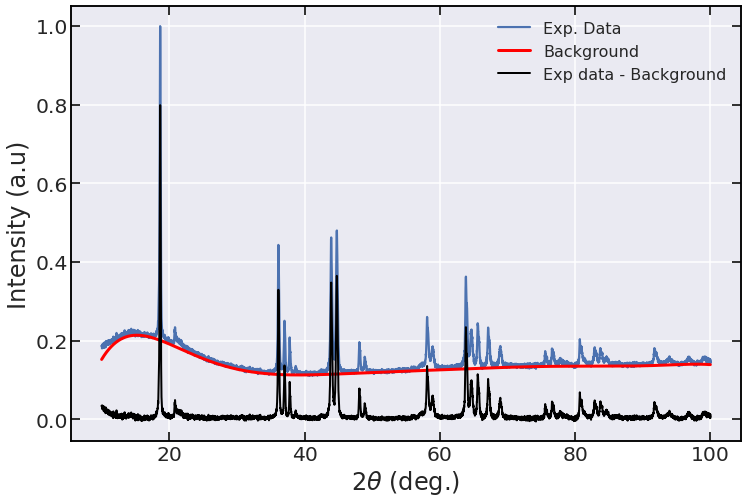

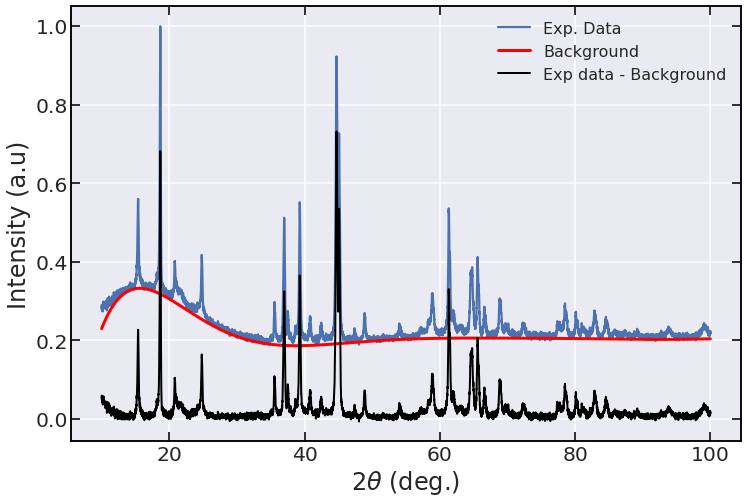

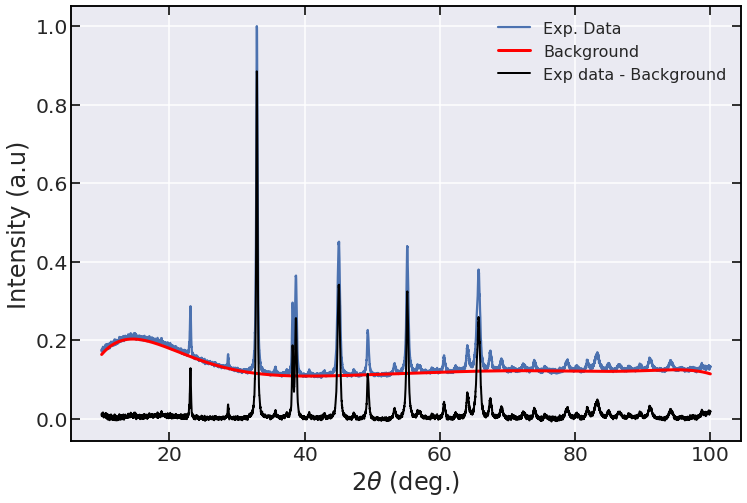

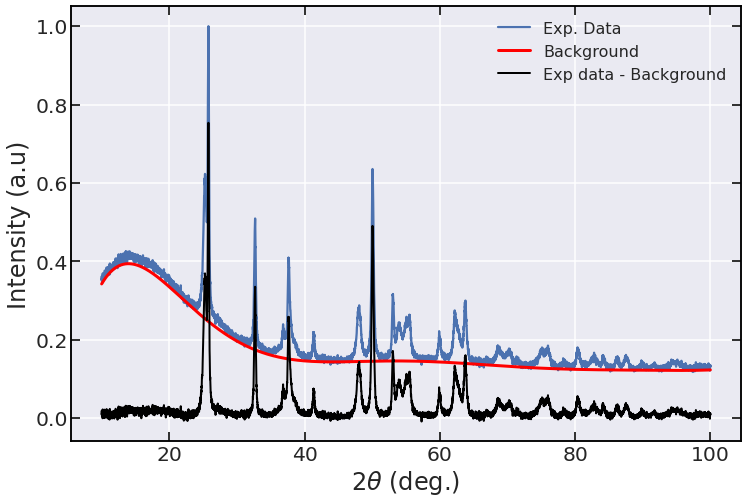

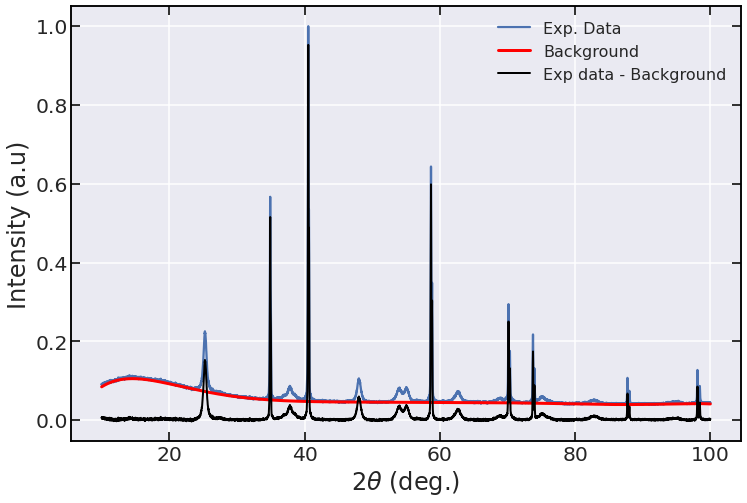

In [18]:
for phase in two_phase:
    # Setup information
    datapath = os.path.join(DATA_BENCHMARK, phase)
    elements = file_to_elements(phase)
    working_folder = file_to_folder(phase)
    
    # Create Xray object
    run = XRay(name=phase,
               exp_data_file=datapath,
               elements=elements,
               remove_background=True,
               working_folder=working_folder,
               max_oxy=4)
    
    
    # Analyze and store.
    run.analyze(n_runs="auto")
    
    # Save objecti nto memory?
    results_auto[phase] = run
    
for phase in three_phase:
    # Setup information
    datapath = os.path.join(DATA_BENCHMARK, phase)
    elements = file_to_elements(phase)
    working_folder = file_to_folder(phase)
    
    # Create Xray object
    run = XRay(name=phase,
               exp_data_file=datapath,
               elements=elements,
               remove_background=True,
               working_folder=working_folder,
               max_oxy=4)
    
    
    # Analyze and store.
    run.analyze(n_runs="auto")
    
    # Save objecti nto memory?
    results_auto[phase] = run

# Save results into CSV
path_auto = "benchmark/results/auto/"
for k,v in results_auto.items():
    filename = k.replace("_parsed.csv", "_results_auto.csv")
    v.results.to_csv(os.path.join(path_auto, filename))

# Parse Results and Check Answers

In [3]:
# Fix different compositions to the correct answer
composition_map = {'Li6.48Mn14.24O32': 'LiMn2O4',
 'Li8.832Mn15.168O32': 'LiMn2O4',
 'MnF2': 'MnF2',
 'MnO': 'MnO',
 'Li2MnO3': 'Li2MnO3',
 'TiO2': 'TiO2',
 'Mn2O3': 'Mn2O3',
 'LiMnO2': 'LiMnO2',
 'Li2TiO3': 'Li2TiO3',
 'LiF': 'LiF',
 'Li36Mn72O144': 'LiMn2O4'}
 
# Set the ground thruth for the detected phase 
ground_truth = {'Li2MnO3': 'C2/m',
 'MnO': 'Fm-3m',
 'TiO2': 'I4_1/amd',
 'MnF2': 'P4_2/mnm',
 'LiMnO2': 'Pmmn',
 'LiMn2O4': 'Fd-3m',
 'Mn2O3': 'Ia-3',
 'LiF': 'Fm-3m',
 "Li2TiO3": "C2/c"}

In [4]:
from pathlib import Path
import os
import pandas as pd
from pymatgen import Composition
auto_path = Path("benchmark/results/auto/")

# Load data
data_auto = {}
for file in auto_path.glob("*.csv"):
    materials = os.path.basename(file).split("_results_auto.csv")[0]
    data_auto[materials] = pd.read_csv(file)
    


In [5]:
from typing import List, Tuple
def check_result(materials_mixed: Tuple, results_names: List[str], results_spg: List[str]):
    """Compare the obtained results by Xerus with the ones labeled by the groudtruth (based on AtomWork.)

    Parameters
    ----------
    materials_mixed : List[str]
        This is just the materials mixed before tkaing XRD
    results_names : List[str]
        Results suggested by Xerus (usually at loc[0], lowest at Rwp)
    results_spg : List[str]
        The spg of each composition
    """

    correct = []
    wrong = []
    number_of_phases = len(materials_mixed)  # Scale the maping from 0,...n to 1,...n+1.
    phases_detected = len(results_name)
    # Lets first map the composition to the correct scale.
    for composition, spacegroup in zip(results_names, results_spg):
        mapped_composition = composition_map[composition]
        if mapped_composition not in materials_mixed:
            wrong.append((composition, spacegroup))
        elif ground_truth[mapped_composition] == spacegroup:
            correct.append((composition, spacegroup))
        else:
            wrong.append((composition, spacegroup))
    
    results = {
            "mixture": materials_mixed, 
            "correct": correct,
            "wrong": wrong,
            "total_correct": len(correct),
            "total_wrong": number_of_phases - len(correct),
            "number_of_phases": number_of_phases,
            "number_of_phases_detected": phases_detected
        
    }

    return results



In [6]:
auto_bench_results = []
for mix, df in data_auto.items():
    results_name = eval(df.name.iat[0])
    results_spg = eval(df.spacegroup.iat[0])
    mixture = tuple(mix.split("+"))
    auto_bench_results.append(check_result(mixture, results_name, results_spg))

In [7]:
auto_benchmark = pd.DataFrame.from_records(auto_bench_results)

In [10]:
auto_benchmark.sort_values(by="number_of_phases", ascending=False)

,mixture,correct,wrong,total_correct,total_wrong,number_of_phases,number_of_phases_detected
0,"(Li2TiO3, MnF2, LiMn2O4)","[(Li6.48Mn14.24O32, Fd-3m), (MnF2, P4_2/mnm)]",[],2,1,3,2
1,"(Li2MnO3, MnO, TiO2)","[(MnO, Fm-3m), (Li2MnO3, C2/m), (TiO2, I4_1/amd)]",[],3,0,3,3
2,"(Mn2O3, TiO2, LiMnO2)","[(Mn2O3, Ia-3), (LiMnO2, Pmmn), (TiO2, I4_1/amd)]",[],3,0,3,3
3,"(Mn2O3, Li2TiO3, TiO2)","[(Mn2O3, Ia-3), (Li2TiO3, C2/c)]",[],2,1,3,2
7,"(LiMn2O4, LiF, Li2MnO3)","[(LiF, Fm-3m)]","[(Li36Mn72O144, I4_1/amd), (LiMnO2, Pmmn)]",1,2,3,3
4,"(Mn2O3, LiF)","[(Mn2O3, Ia-3), (LiF, Fm-3m)]",[],2,0,2,2
5,"(TiO2, MnO)","[(MnO, Fm-3m), (TiO2, I4_1/amd)]",[],2,0,2,2
6,"(MnF2, TiO2)","[(MnF2, P4_2/mnm), (TiO2, I4_1/amd)]",[],2,0,2,2
8,"(LiMn2O4, Li2MnO3)","[(Li8.832Mn15.168O32, Fd-3m)]","[(Li2MnO3, C2/c)]",1,1,2,2
9,"(LiMnO2, Li2MnO3)","[(Li2MnO3, C2/m), (LiMnO2, Pmmn)]",[],2,0,2,2


**Note**: As noted in the paper, we believe that the mixture of LiMn2O4, LiF and Li2MnO3 actually contains LiMnO2 instead of Li2MnO3.

**Note$^{2}$**: The first index, Li2TiO3 is missing from identification. Thus, counts as misclassified.